In [1]:
import sys
import os
import numpy as np
import matplotlib as mpl
import pandas as pd

from scipy.stats import gaussian_kde

mpl.use('Agg')

mpl.rcParams['figure.figsize'] = (7,7)
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
mpl.rcParams.update({'font.size':22})

% matplotlib inline

import matplotlib.pyplot as plt

In [2]:
import tools.matt_tools as matt # useful plotting tools I made

In [3]:
from tools.catalog import Catalog # catalog base class

# Load catalogs

In [4]:
wdir = '/home/mho1/scratch/halo_cnn'

In [5]:
pure_cat = Catalog().load(os.path.join(wdir,'data_mocks','Rockstar_UM_z=0.194_pure.p'))

contam_cat = Catalog().load(os.path.join(wdir,'data_mocks','Rockstar_UM_z=0.194_contam.p'))

Loading catalog from: /home/mho1/scratch/halo_cnn/data_mocks/Rockstar_UM_z=0.194_pure.p
Loading catalog from: /home/mho1/scratch/halo_cnn/data_mocks/Rockstar_UM_z=0.194_contam.p


# Catalog characteristics

In [6]:
print('pure_len: ', len(pure_cat))
print('contam_len: ', len(contam_cat))

pure_len:  208798
contam_len:  263217


[]

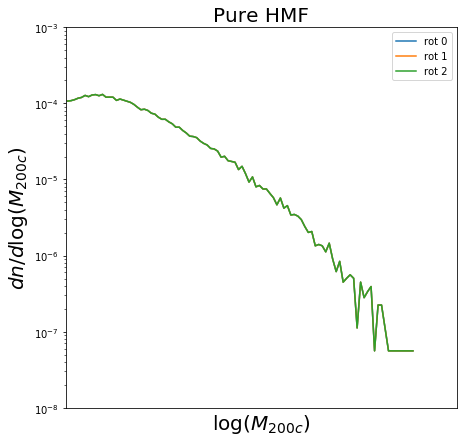

In [7]:
f = plt.figure(figsize=(7,7))
ax = f.add_subplot(111)

for r in [0,1,2]:#range(int(pure_cat.prop['rotation'].max()+1)):
    
    matt.histplot(np.log10(pure_cat.prop['M200c'][pure_cat.prop['rotation']==r].values), 
              n=100, label='rot ' + str(r), log=1, box=True, ax=ax)
    
ax.set_title('Pure HMF', fontsize=20)
ax.set_xlabel(r'$\log(M_{200c}$)', fontsize=20)
ax.set_ylabel(r'$dn/d\log(M_{200c})$', fontsize=20)
ax.legend()

ax.set_xlim(13.5,15.5)
ax.set_ylim(10**-8,10**-3)


ax.set_xticks([])

(1e-08, 0.001)

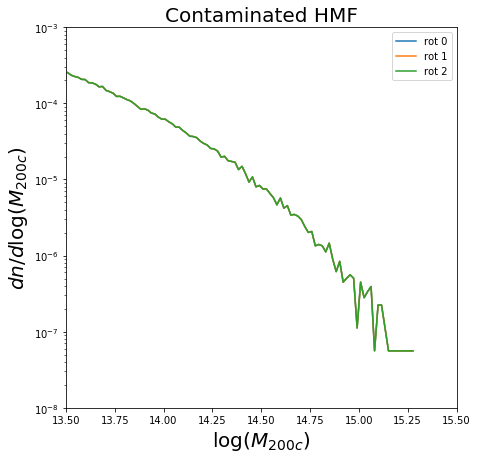

In [8]:
f = plt.figure(figsize=(7,7))
ax = f.add_subplot(111)

for r in [0,1,2]:#range(int(contam_cat.prop['rotation'].max()+1)):
    
    matt.histplot(np.log10(contam_cat.prop['M200c'][contam_cat.prop['rotation']==r].values), 
              n=100, label='rot ' + str(r), log=1, box=True, ax=ax)
    
ax.set_title('Contaminated HMF', fontsize=20)
ax.set_xlabel(r'$\log(M_{200c}$)', fontsize=20)
ax.set_ylabel(r'$dn/d\log(M_{200c})$', fontsize=20)
ax.legend()

ax.set_xlim(13.5,15.5)
ax.set_ylim(10**-8,10**-3)

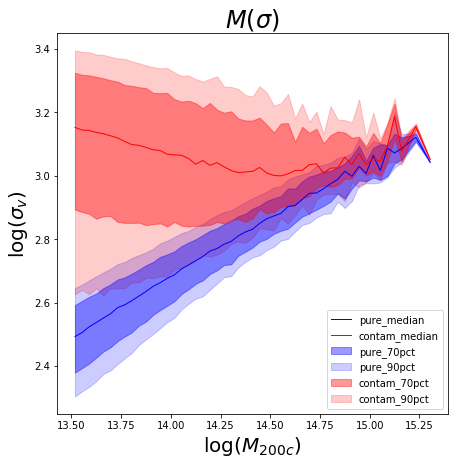

In [9]:
rot = 0

f = plt.figure(figsize=(7,7))
ax = f.add_subplot(111)

matt.binnedplot(np.log10(pure_cat.prop['M200c'][pure_cat.prop['rotation']==rot]),
                np.log10(pure_cat.prop['sigv'][pure_cat.prop['rotation']==rot]), 
                percentiles=[35,45],
                n=50, label='pure_',ax=ax, log=0, c='b', names=True)
matt.binnedplot(np.log10(contam_cat.prop['M200c'][contam_cat.prop['rotation']==rot]),
                np.log10(contam_cat.prop['sigv'][contam_cat.prop['rotation']==rot]), 
                percentiles=[35,45],
                n=50, label='contam_',ax=ax, log=0, c='r', names=True)

# ax.set_xlim(14,15.3)
# ax.set_ylim(2.3,3.3)

plt.xlabel(r'$\log(M_{200c})$', fontsize=20)
plt.ylabel(r'$\log(\sigma_v)$', fontsize=20)
plt.title('$M(\sigma)$', fontsize=24)
ax.legend(loc=4)

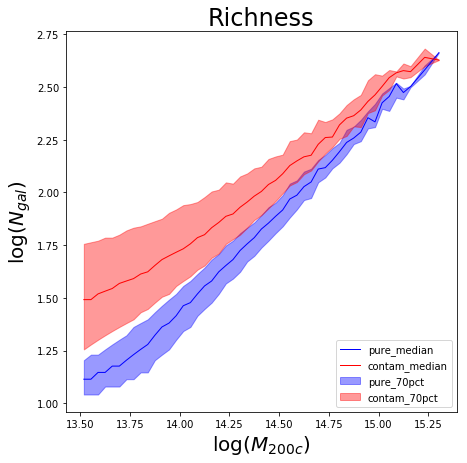

In [10]:
rot = 0

f = plt.figure(figsize=(7,7))
ax = f.add_subplot(111)

matt.binnedplot(np.log10(pure_cat.prop['M200c'][pure_cat.prop['rotation']==rot]),
                np.log10(pure_cat.prop['Ngal'][pure_cat.prop['rotation']==rot]), 
                percentiles=[35],
                n=50, label='pure_',ax=ax, log=0, c='b', names=True)
matt.binnedplot(np.log10(contam_cat.prop['M200c'][contam_cat.prop['rotation']==rot]),
                np.log10(contam_cat.prop['Ngal'][contam_cat.prop['rotation']==rot]), 
                percentiles=[35],
                n=50, label='contam_',ax=ax, log=0, c='r', names=True)

# ax.set_xlim(15,15.3)

plt.xlabel(r'$\log(M_{200c})$', fontsize=20)
plt.ylabel(r'$\log(N_{gal})$', fontsize=20)
plt.title('Richness', fontsize=24)
ax.legend(loc=4)

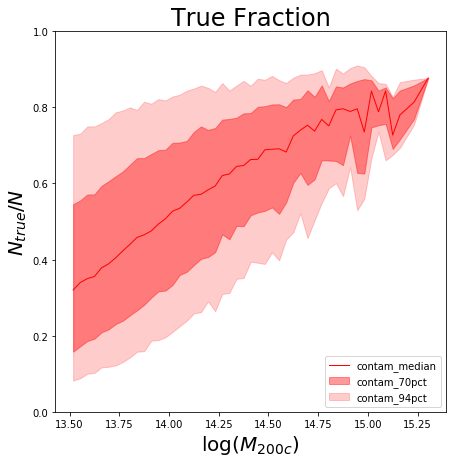

In [11]:
rot = 0

f = plt.figure(figsize=(7,7))
ax = f.add_subplot(111)

frac = pd.Series([np.sum(contam_cat.gal[i]['true_memb'])/contam_cat.prop.loc[i,'Ngal']
                  for i in contam_cat.prop.index[contam_cat.prop['rotation']==rot].values
                 ])

matt.binnedplot(np.log10(contam_cat.prop['M200c'][contam_cat.prop['rotation']==rot]),
                frac, 
                percentiles=[35, 47],
                n=50, label='contam_',ax=ax, log=0, c='r', names=True)

# ax.set_xlim(15,15.3)
ax.set_ylim(0,1)

plt.xlabel(r'$\log(M_{200c})$', fontsize=20)
plt.ylabel(r'$N_{true}/N$', fontsize=20)
plt.title('True Fraction', fontsize=24)
ax.legend(loc=4)

## Random Cluster

In [12]:
rcut = contam_cat.par['aperture'] #Mpc/h
vcut = contam_cat.par['vcut'] #km/s

host id: 11482863015.0
rotation: 1.0
log(M_200c): 13.975381252769973


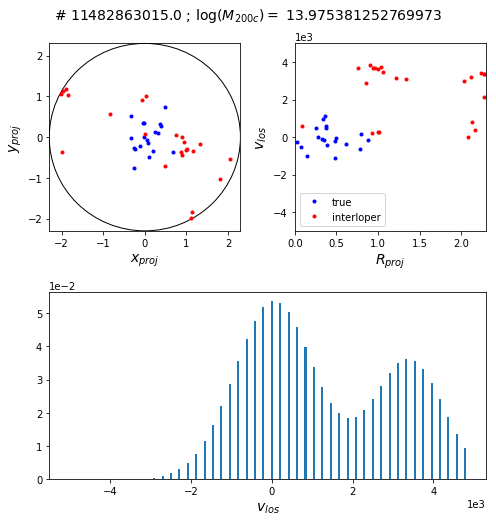

In [13]:
i = np.random.randint(0, len(contam_cat))

print('host id: ' + str(contam_cat.prop['rockstarId'][i]))
print('rotation: ' + str(contam_cat.prop['rotation'][i]))
print('log(M_200c): ' + str(np.log10(contam_cat.prop['M200c'][i])))

f = plt.figure(figsize=[7,7])
gs = mpl.gridspec.GridSpec(2,2)


ax1 = f.add_subplot(gs[0,0])

x = contam_cat.gal[i]['xproj']
y = contam_cat.gal[i]['yproj']

ax1.plot(x[contam_cat.gal[i]['true_memb']==1],
         y[contam_cat.gal[i]['true_memb']==1],
         '.', c='b')
ax1.plot(x[contam_cat.gal[i]['true_memb']!=1],
         y[contam_cat.gal[i]['true_memb']!=1],
         '.', c='r')
circle = plt.Circle((0, 0), radius = rcut, edgecolor='k', facecolor='none')
ax1.add_artist(circle)

ax1.set_xlim(-rcut,rcut)
ax1.set_ylim(-rcut,rcut)
ax1.ticklabel_format(style='sci',axis='both', scilimits=(-1,1))
ax1.set_xlabel('$x_{proj}$', fontsize=14)
ax1.set_ylabel('$y_{proj}$', fontsize=14)


ax2 = f.add_subplot(gs[0,1])
x = np.sqrt(contam_cat.gal[i]['xproj']**2 + contam_cat.gal[i]['yproj']**2)
y = contam_cat.gal[i]['vlos']

# ax2.plot(np.arange(0,6./5*rcut,rcut/5.),[0]*6, c='k', linestyle='dashed')

ax2.plot(x[contam_cat.gal[i]['true_memb']==1],
         y[contam_cat.gal[i]['true_memb']==1],
         '.', c='b',label='true')
ax2.plot(x[contam_cat.gal[i]['true_memb']!=1],
         y[contam_cat.gal[i]['true_memb']!=1],
         '.', c='r',label='interloper')
plt.legend()

ax2.set_xlim(0,rcut)
ax2.set_ylim(-vcut,vcut)
ax2.ticklabel_format(style='sci',axis='both', scilimits=(-1,1))
ax2.set_xlabel('$R_{proj}$', fontsize=14)
ax2.set_ylabel('$v_{los}$', fontsize=14)



ax3 = f.add_subplot(gs[1,:])
kde = gaussian_kde(contam_cat.gal[i]['vlos'])
pos = np.arange(-vcut,vcut, vcut/(48/2.))
y = kde(pos)
y /= np.sum(y)

ax3.bar(pos, y, width=50)

ax3.ticklabel_format(style='sci',axis='both', scilimits=(-1,1))
ax3.set_xlabel('$v_{los}$', fontsize=14)

f.suptitle('# ' + str(contam_cat.prop['rockstarId'][i]) + 
           ' ; $\log(M_{200c}) = $ ' + str(np.log10(contam_cat.prop['M200c'][i])), 
           y=1.03,fontsize=14)

plt.tight_layout()

# f.savefig(os.path.join(img_savedir,'MD_cluster.pdf'))